<h2>Machine learning and data analysis applied in stock market</h2>
We demonstrate the power of using machine learning algorithms, mathematical models, and computational techniques in understanding stock market, providing data-driven solutions for strategy development and business growth.

In [1]:
# IMPORTING LIBRARIES

# Libraries for data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Libraries for optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Libraries for financial data
import quantstats as qs
import ta
import yfinance as yf
import requests

# Libraries for machine learning models
from sklearn.linear_model import LinearRegression

# Libraries for data and time and disabling warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Getting daily returns within the time period considered
tickers = ['AAPL', 'TSLA','DIS','AMD','NVDA']
start_date = '2020-01-01'
end_date = '2024-08-01'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns = qs.utils.to_returns(data)
daily_returns_percent = daily_returns * 100

# Display the first few rows of daily returns in percentages
print(daily_returns_percent.head())

[*********************100%%**********************]  5 of 5 completed

Ticker          AAPL       AMD       DIS      NVDA      TSLA
Date                                                        
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-03 -0.972193 -1.018330 -1.147095 -1.600623  2.963326
2020-01-06  0.796826 -0.432097 -0.580208  0.419377  1.925464
2020-01-07 -0.470322 -0.289315  0.034327  1.210659  3.880052
2020-01-08  1.608642 -0.870463 -0.205903  0.187562  4.920483


## Using statistical analysis in evaluation stock performance
This analysis leverages various statistical techniques to evaluate stock performance, including daily and cumulative returns, histograms, kurtosis, skewness, standard deviation, pairplots, correlation matrices, and calculations of beta, alpha, and Sharpe Ratio. These metrics provide a comprehensive understanding of stock volatility, returns, and risk-adjusted performance, offering valuable insights into investment decisions.

<b>Investigating Daily Returns</b>
We look at different US stocks over the same period of time and compare their performance based on the trend of their daily returns.

Plotting daily returns for AAPL


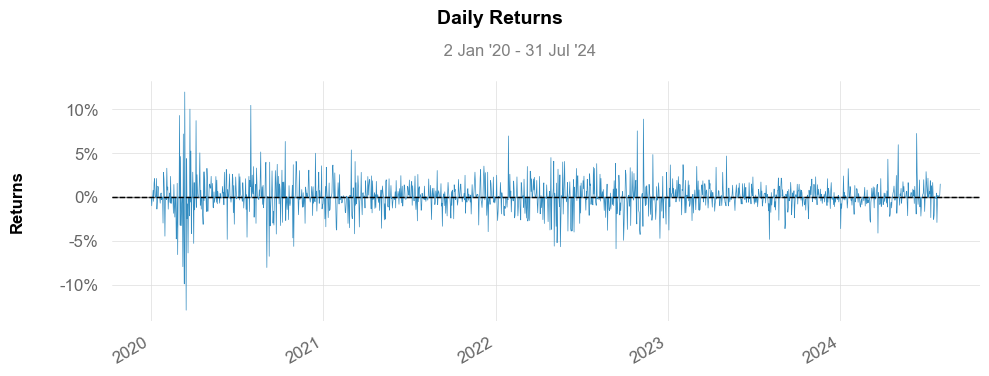

Plotting daily returns for TSLA


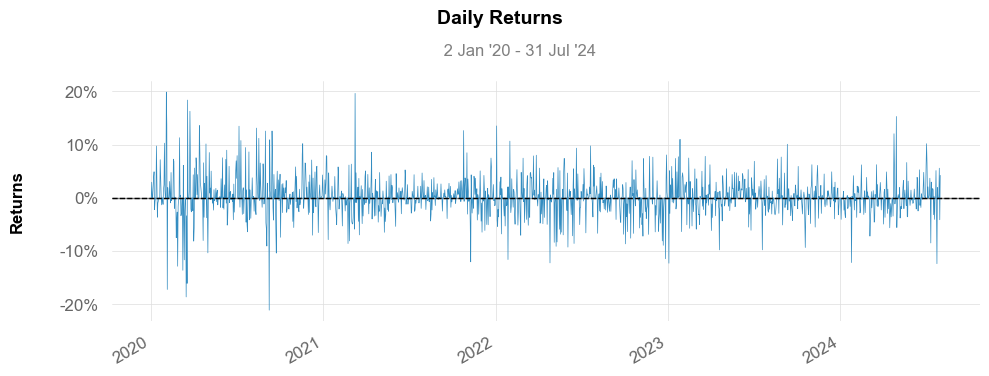

Plotting daily returns for DIS


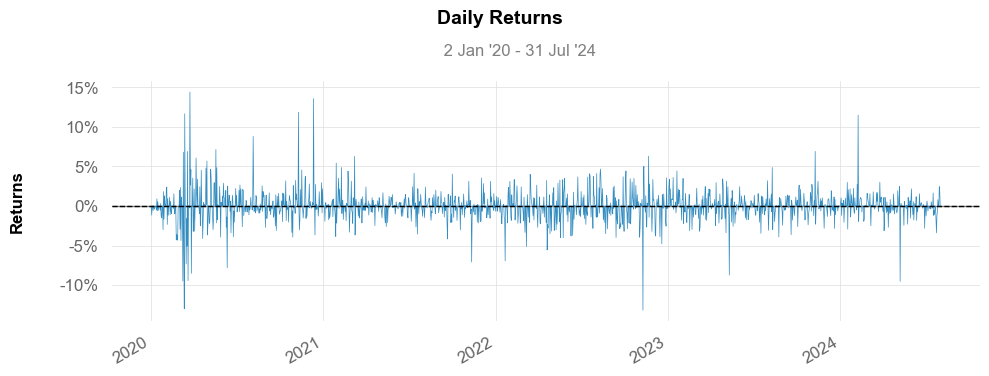

Plotting daily returns for AMD


Plotting daily returns for NVDA


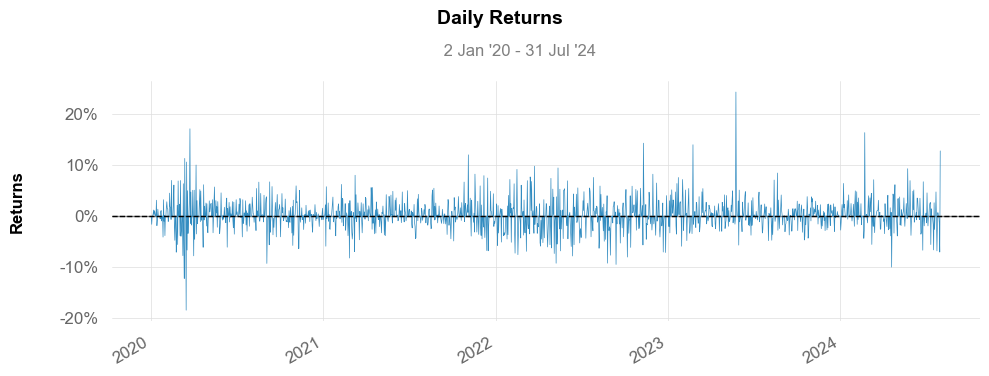

In [3]:
# Plotting Daily Returns for each US stock
for ticker in tickers:
    print(f"Plotting daily returns for {ticker}")
    qs.plots.daily_returns(daily_returns[ticker], benchmark=None)

The plots of the daily returns for each stock demonstrate volatility, with variations in the swings with  magnitude of 10% to 20% during the pandemic shock (early 2020). We can also observe decrease in the volatility of daily returns from 2021 up to latest year as these companies recover from market unpredictability. 

We can observe occassional peaks in NVDA and dips in DIS through post-pandemic recovery and growth.  

<b>Cumulative Returns</b> measure the cumulative gain(loss) of an investment for a specified period of time. It is calculated using the difference of the final stock price and the initial stock price, by which the dividends and other income received are added, and the resulting value is divided by the initial stock price. The cumulative return also takes into account the effect of compounding as any gains(losses) are reinvested, which contributes to the additional returns in the future periods.


Plotting cumulative returns for AAPL:



Plotting cumulative returns for TSLA:


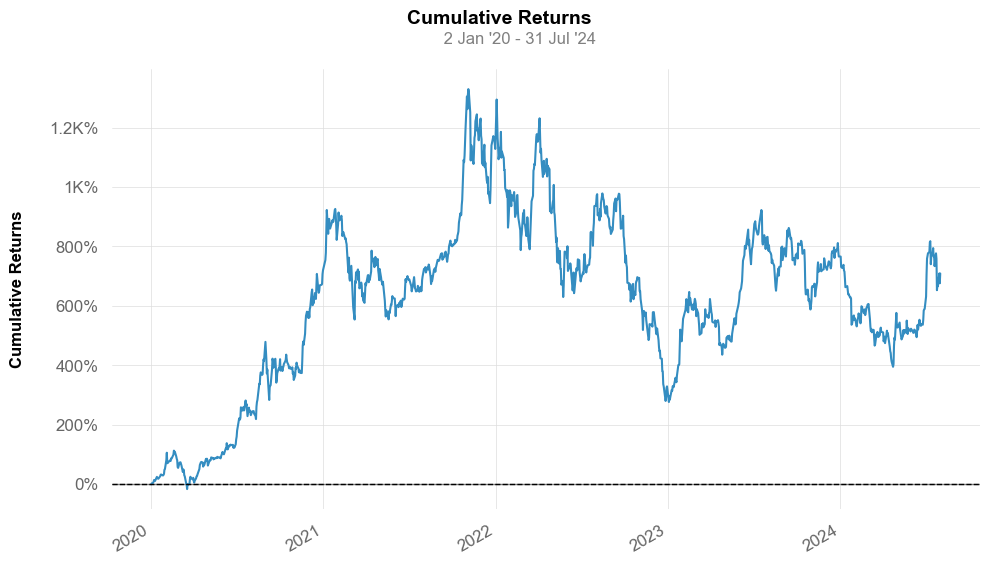


Plotting cumulative returns for DIS:



Plotting cumulative returns for AMD:


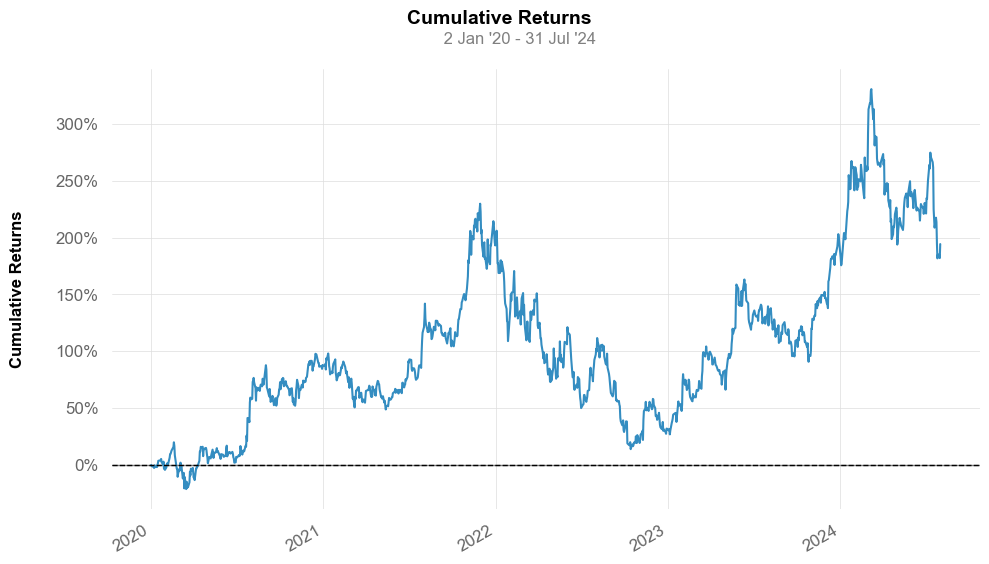


Plotting cumulative returns for NVDA:


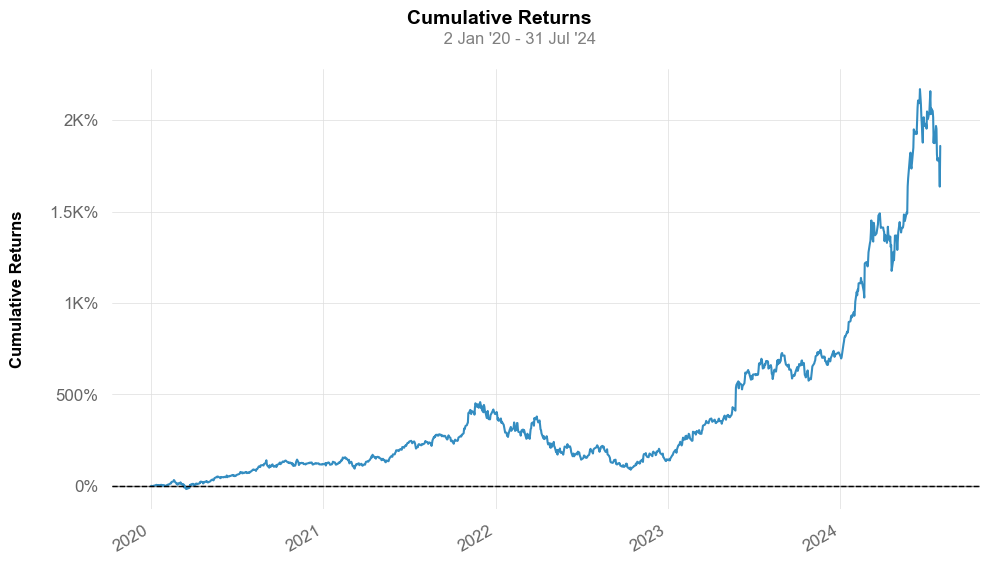

In [15]:
# Plotting Daily Returns for each US stock
for ticker in tickers:
    print(f"\nPlotting cumulative returns for {ticker}:")
    qs.plots.returns(data[ticker], benchmark=None)

The cumulative return plots show Tesla and NVIDIA reaching 1,200% and 2,000% increase, respectively, over the considered time period. This shows a high return for investors who bought stocks during 2020. Moderate performances on Apple and AMD stocks were observed. In contrast among others, The Walt Disney stocks performed lowly with returns ranging only around 40% post-pandemic and have faced challenges in the recent years evident in the sustained negative cumulative returns. 

#### Use of stastical analysis in understanding stock trends based on their distribution measures
Using histograms to show the graphical representation of the frequency of certain parameters. The histogram of daily returns help identify patterns that indicate the level of stability and volatity of stock prices over a period of time.


Histogram of Daily Returns for AAPL:



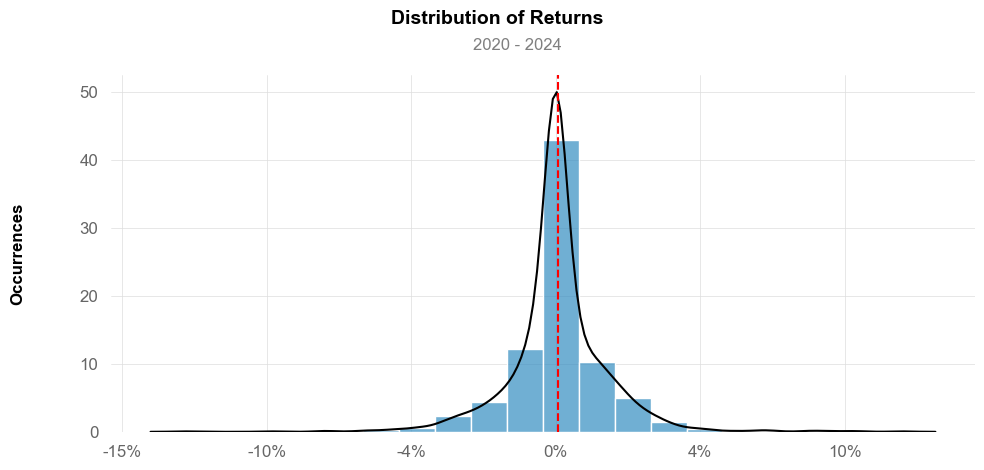


Histogram of Daily Returns for TSLA:



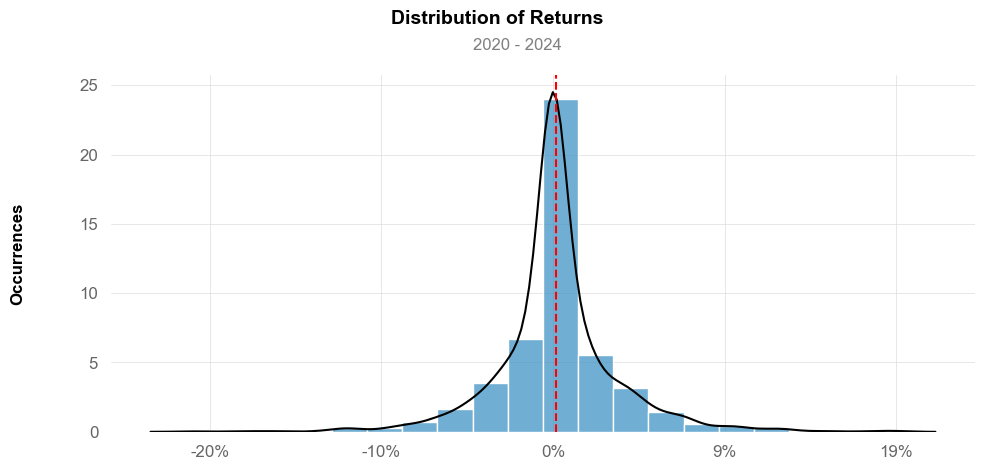


Histogram of Daily Returns for DIS:



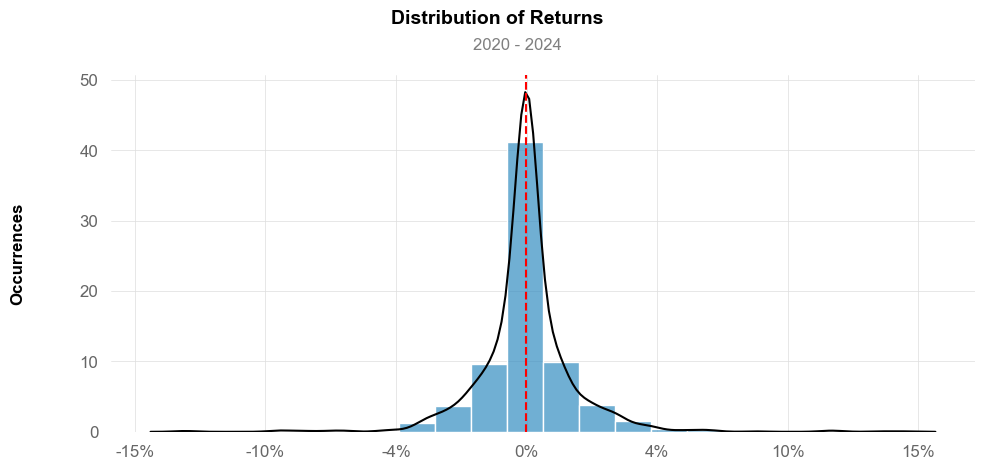


Histogram of Daily Returns for AMD:



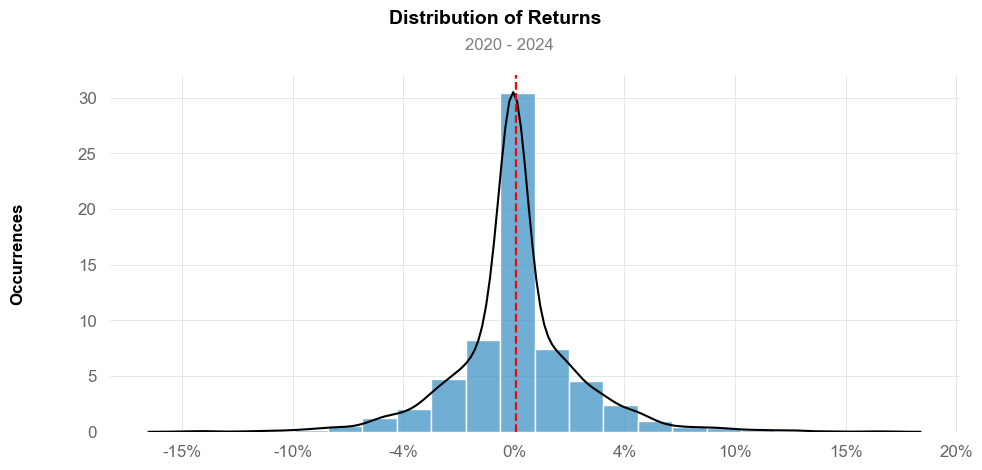


Histogram of Daily Returns for NVDA:



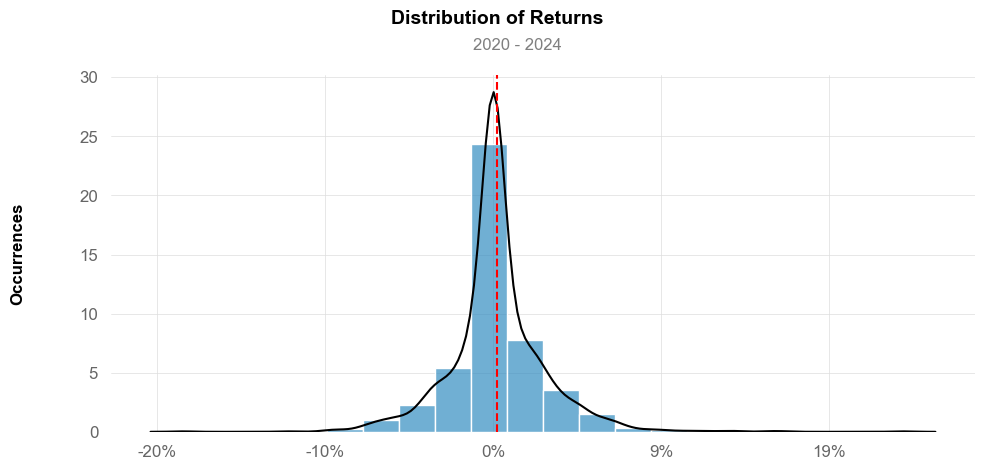

In [17]:
# Plotting histograms of Daily Returns for each US stock
for ticker in tickers:
    print(f"\nHistogram of Daily Returns for {ticker}:\n")
    qs.plots.histogram(data[ticker], resample = 'D')

The histograms show that most daily returns for each stocks considered are close to zero, the center of the distribution, with the spread reading to (plus minus) 15% - 20%. We can see that there are no presence of outliers and that all have fairly balanced returns. Other statistical measures such as the <b>kurtosis</b>, <b>skewness</b>, and <b>standard deviation</b> can be derived from the histogram. 

The <b>kurtosis</b> describes the distribution of the data points, particulary the tails and the peak of the distribution. This measure can be categorized into the following: 
<ul>
    <li>Leptokurtic: Values above 3.0 which indicates sharp peak and heavy tails.</li>
    <li>Mesokurtic: Values equal to 3.0 which is similar to a normal distribution.</li>
    <li>Platykurtic: Values less than 3.0 which indicates flatter peak and light tails.</li> 
</ul>
In finance, a leptokurtic distribution indicates that an investment option has a higher chance of extreme returns, thus classified as a risky investment with potentially higher reward or loss. A mesokurtic distribution corresponds to a moderate level of extreme returns. Lastly, a platykurtic distribution indicates a stable option of investment as it has lower chance of extreme returns.

In [18]:
# Using quantstats to measure kurtosis
for ticker in tickers:
    print(f"\n{ticker}'s kurtosis: ",qs.stats.kurtosis(data[ticker]).round(2))


AAPL's kurtosis:  5.05

TSLA's kurtosis:  2.94

DIS's kurtosis:  8.09

AMD's kurtosis:  2.13

NVDA's kurtosis:  4.17


The stocks Walt Disney, Apple, and NVIDIA (in order from highest to lowest) are identified with a leptokurtic distribution, suggesting that these stocks demonstrates high levels of volatility and risk. While Tesla, with kurtosis close to 3.0, shows a normal distribion which suggests that it's a moderate investment option. Lastly, AMD shows a platykurtic distribution  suggesting its low chance of extreme returns.

The <b>skewness</b> describes the asymmetry of the distribution of the data points, it indicates the direction and skew or deviation from a normal distribution. The two categories are the following:
<ul>
    <li>Positive skew (right skew): The tail on the right side of the distribution is longer. Most values are concentrated on the left with a few large values on the right</li>
    <li>Negative skew (left skew): The tail on the left side of the distribution is longer. Most values are concentrated on the right with a few large values on the left</li>
</ul>
In finance, a positive skew indicates that most returns are concentrated on the lower end with ocassional high returns. While a negative skew indicates that most returns are concentrated on the higher end with ocassional low returns.

In [19]:
# Using quantstats to measure skewness
for ticker in tickers:
    print(f"\n{ticker}'s skewness: ", qs.stats.skew(data[ticker]).round(2))


AAPL's skewness:  0.12

TSLA's skewness:  0.11

DIS's skewness:  0.32

AMD's skewness:  0.2

NVDA's skewness:  0.45


The skewness measure for all stocks demonstrates moderate level of skewness as they fall within -0.50 to 0.50. A general observation from the positive skew suggests that the stocks considered have small investment returns with chance of occasional high returns.

The <b>standard deviation</b> measures the dispersion of the data points from the mean. A low standard deviation indicates that values are close to the mean and high standard deviation signifies a wider spread of the values.

In finance, a low standard deviation indicates that returns are close to the average return, which makes it a less risky investment as it's predictable and stable. While a high standard deviation indicates that returns are more volatile as it is spread out, which makes it a risky investment given the chances of extreme returns on gains and losses.

In [29]:
# Calculating the mean and standard deviation
print("Considering the period from Jan 2020 to July 2024: ")
for ticker in tickers:
    print(f"\n{ticker}'s average return is ", np.round(daily_returns[ticker].mean(),3) ," and standard deviation is ", np.round(daily_returns[ticker].std(),3))

Considering the period from Jan 2020 to July 2024: 

AAPL's average return is  0.001  and standard deviation is  0.021

TSLA's average return is  0.003  and standard deviation is  0.042

DIS's average return is  -0.0  and standard deviation is  0.022

AMD's average return is  0.001  and standard deviation is  0.033

NVDA's average return is  0.003  and standard deviation is  0.034


The following stocks considered show high standard deviation relative to their average returns signifying volatility.

<b>Correlation analysis</b> evaluates the strength and direction of the linear relationship between two variables. This statistical method can be used in comparing stocks, specifically for diversification and risk management. A positive correlation indicates two stocks moving in the same direction, being influenced by similar factors, while a negative correlation indicates two stocks moving in opposite direction. Insights from correlation analysis are beneficial for devising hedging strategies and pairs trading.

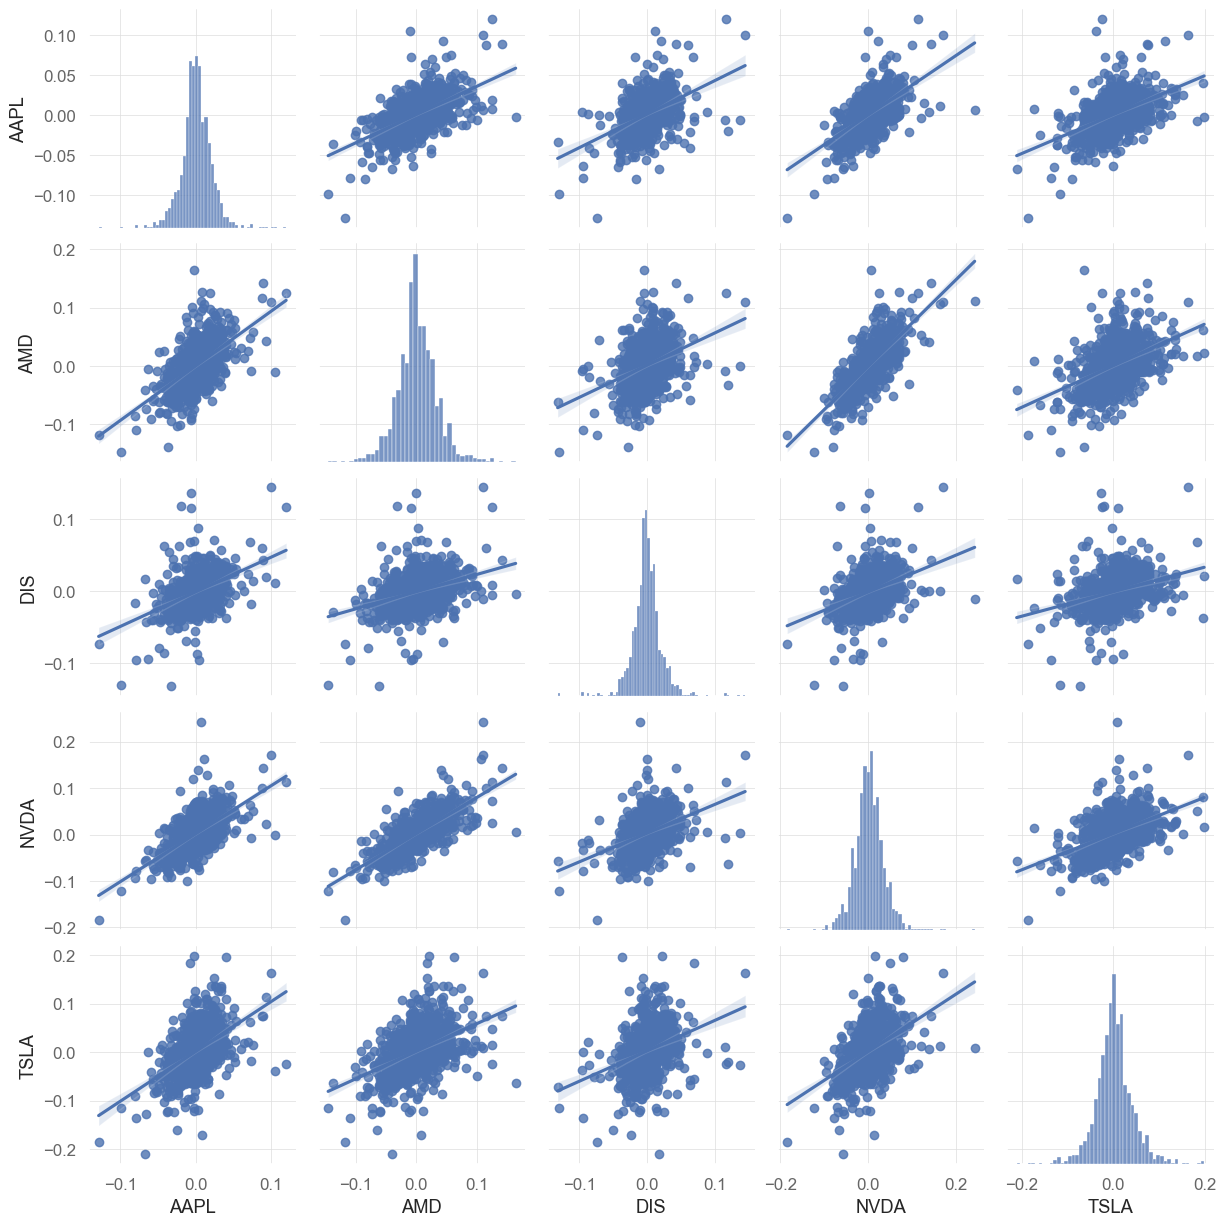

In [32]:
sns.pairplot(daily_returns, kind = 'reg')
plt.show()

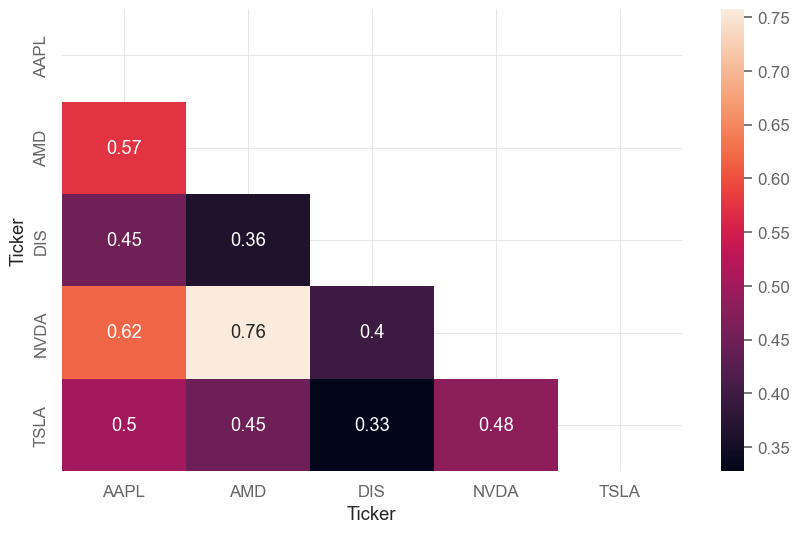

In [33]:
# Calculating correlation matrix
corr = daily_returns.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

The correlation matrix indicates a positive correlation among all the stocks considered: Tesla, Disney, AMD, Nvidia, and Apple. Notably, Nvidia exhibits a stronger correlation with both Apple and AMD. It is important to observe that none of the stocks demonstrate a negative correlation with each other, meaning none of them can effectively act to limit losses through diversification. In hedging strategies, stocks that are inversely correlated are typically selected to minimize the risk of potential losses in the overall portfolio.

The <b>Beta</b> ($\beta$) and <b>Alpha</b> ($\alpha$) are financial metrics that measures the performance of a stock relative to the overall market. 
Beta is a measure of stock's volatility compared to the market, categorized by the following thresholds:
<ul>
    <li>$\beta$ = 1: the stock is as volatile as the market</li>
    <li>$\beta$ > 1: the stock has higher volatility than the market</li>
    <li>$\beta$ < 1: the stock has lower volatility than the market</li>
</ul>
On the other hand, Alpha measures the stock's excess return relative to its expected performance based on its $\beta$, categorized into:
<ul>
    <li>positive $\alpha$: the stock has outperformed its expected performance based on its $\beta$</li>
    <li>negative $\alpha$: the stock has underperformed its expected performance based on its $\beta$</li>
</ul>

We will use SP500 as benchmark, for a linear regression model, in determining the Beta and Alpha of the stocks.

In [34]:
# Getting daily returns of the index within the same time period
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc[start_date:end_date]
sp500.index = sp500.index.tz_localize(None)

[*********************100%%**********************]  1 of 1 completed


In [37]:
daily_returns.insert(0,'SP500',sp500)
daily_returns

Ticker         SP500      AAPL       AMD       DIS      NVDA      TSLA
Date                                                                  
2020-01-02  0.008379  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-03 -0.007060 -0.009722 -0.010183 -0.011471 -0.016006  0.029633
2020-01-06  0.003533  0.007968 -0.004321 -0.005802  0.004194  0.019255
2020-01-07 -0.002803 -0.004703 -0.002893  0.000343  0.012107  0.038801
2020-01-08  0.004902  0.016086 -0.008705 -0.002059  0.001876  0.049205
...              ...       ...       ...       ...       ...       ...
2024-07-25 -0.005143 -0.004805 -0.043629 -0.006570 -0.017243  0.019723
2024-07-26  0.011090  0.002161  0.012073  0.008071  0.006947 -0.002043
2024-07-29  0.000813  0.001285 -0.001714  0.024575 -0.013002  0.055960
2024-07-30 -0.004960  0.002566 -0.009374  0.017908 -0.070436 -0.040845
2024-07-31  0.015793  0.014991  0.043629 -0.001066  0.128121  0.042449

[1152 rows x 6 columns]

In [39]:
# Initialize a dictionary to store results
results = {}

# Calculate beta and alpha for each stock using scikit-learn
def calculate_beta_alpha(stock_returns, market_returns):
    # Reshape the returns to fit the model
    market_returns_reshaped = market_returns.values.reshape(-1, 1)
    stock_returns_reshaped = stock_returns.values.reshape(-1, 1)
    
    # Create and fit the linear regression model
    model = LinearRegression().fit(market_returns_reshaped, stock_returns_reshaped)
    
    # Get the beta (slope) and alpha (intercept)
    beta = model.coef_[0][0]
    alpha = model.intercept_[0]
    return beta, alpha

# Calculate beta and alpha for each stock
for ticker in tickers:
    beta, alpha = calculate_beta_alpha(daily_returns[ticker], daily_returns['SP500'])
    results[ticker] = {'Beta': beta, 'Alpha': alpha}

# Display the results
results_df = pd.DataFrame(results).T
results_df

Beta     Alpha
AAPL  1.187369  0.000511
TSLA  1.532459  0.001843
DIS   1.049932 -0.000740
AMD   1.550699  0.000625
NVDA  1.733290  0.002195

All stocks exhibit a beta greater than 1, suggesting they are more volatile compared to the S&P 500. Notably, only Disney has a negative alpha, indicating that it has underperformed relative to the expected returns based on its beta and the S&P 500 index.

The <b>Sharpe Ratio</b> measures the risk-adjusted return of an investment or portfolio. It is calculated by dividing the difference of the expected return and the risk-free rate against the standard deviation of the portfolio's excess return. The standard deviation represents the risk of volatility of the portfolio. 

In practice, the risk-free rate is typically based on the return of government bonds. For the analysis, we obtain the data from the yield of a 3-month Tresury bill using `yfinance` as a short-term risk-free rate.


In [40]:
# Fetching the current yield on the 3-month U.S. Treasury bill
t_bill_yield = yf.Ticker("^IRX")  # ^IRX is the symbol for the 3-month Treasury bill yield index
current_yield = t_bill_yield.history(period="1d")['Close'].iloc[-1] / 100  # Converting to a decimal

# Calculate the daily risk-free rate using compount interest rate formula (trading days in a year = 252 days)
daily_risk_free_rate = (1 + current_yield) ** (1 / 252) - 1

print(f"Current 3-month Treasury bill yield: {current_yield}")
print(f"Daily risk-free rate: {daily_risk_free_rate}")

# Calculate the Sharpe Ratio using the daily risk-free rate for each stock
for ticker in tickers:
    sharpe_ratio = qs.stats.sharpe(daily_returns[ticker], rf=daily_risk_free_rate, periods=252)  # `periods` argument annualizes the Sharpe Ratio
    results[ticker] = {'Sharpe_ratio': sharpe_ratio}

# Display the results
results_df = pd.DataFrame(results).T
results_df

Current 3-month Treasury bill yield: 0.049079999923706055
Daily risk-free rate: 0.00019015136831046497


Sharpe_ratio
AAPL      0.910326
TSLA      1.018038
DIS      -0.110388
AMD       0.708872
NVDA      1.466651

The stocks considered exhibit a range of Sharpe Ratios. Tesla and NVIDIA, with Sharpe Ratios greater than 1, particularly NVIDIA with the highest ratio, demonstrate that these stocks provide higher returns for a given level of risk compared to others like Apple and AMD. Notably, Disney has a negative Sharpe Ratio, indicating it underperformed relative to the risk-free asset, the U.S. Treasury bill. 

The Sharpe Ratio offers investors valuable insights into which investments yield adequate returns for the level of risk taken.

### Building and Optimizing Investment Portfolios
This section focuses on constructing and optimizing investment portfolios using advanced optimization models. The goal is to develop a robust portfolio that aligns with specific investment objectives and constraints."

A <b>portfolio</b> is a collection of financial assets, such as stocks, bonds, commodities, and other investments, held by an individual or institution. Investors construct their portfolios to manage risk, enhance returns, and achieve diversification across various asset classes.

The goal of building a portfolio is to create a robust investment strategy that performs well under different economic and market conditions. The allocation of funds across different assets is guided by the investor’s risk tolerance, investment objectives, and time horizon. Portfolios are dynamic and should be periodically reviewed and adjusted to reflect changes in market conditions and ensure alignment with the investor’s risk-return profile.

Portfolio allocation is expressed through weights, which represent the percentage of the total portfolio value assigned to each asset. Determining these weights involves considering factors such as the investor’s risk tolerance, asset performance, growth potential, sector exposure, and diversification benefits. Common techniques for portfolio construction and optimization include Modern Portfolio Theory (MPT) and factor-based investing, which aim to maximize returns while managing risk and aligning with the investor’s overall strategy.

We start by initializing the weight of each stock equally and then determine the optimal weight based on models and algorithms.

In [41]:
n_stock = len(tickers)
weights = np.full(n_stock, 1/n_stock)
portfolio = daily_returns.iloc[:,1:6].multiply(weights, axis=1).sum(axis=1)
print("Portfolio's Daily Return:\n")
print(portfolio)

Portfolio's Daily Return:

Date
2020-01-02    0.000000
2020-01-03   -0.003550
2020-01-06    0.004259
2020-01-07    0.008731
2020-01-08    0.011281
                ...   
2024-07-25   -0.010505
2024-07-26    0.005442
2024-07-29    0.013421
2024-07-30   -0.020036
2024-07-31    0.045625
Length: 1152, dtype: float64


Using Quanstats, we can obtain a detailed analysis of a portfolio's performance compared to a benchmark. We compare the portfolio with S&P 500 index for the time period considered.

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-01-03   2020-01-03
End Period                 2024-07-31   2024-07-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          69.51%       399.06%
CAGR﹪                     8.28%        27.43%

Sharpe                     0.64         1.13
Prob. Sharpe Ratio         91.09%       99.13%
Smart Sharpe               0.59         1.05
Sortino                    0.89         1.63
Smart Sortino              0.83         1.51
Sortino/√2                 0.63         1.15
Smart Sortino/√2           0.59         1.07
Omega                      1.21         1.21

Max Drawdown               -33.92%      -52.04%
Longest DD Days            745          739
Volatility (ann.)          21.88%       37.6%
R^2                        0.67         0.67
Information Ratio          0.08         0.08
Calmar             

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-01-04  2022-12-28  2024-01-12   739    -52.039881        -49.815568
2  2020-02-20  2020-03-18  2020-06-04   106    -38.988994        -37.724426
3  2021-02-12  2021-03-08  2021-06-25   134    -17.125976        -14.475558
4  2020-09-02  2020-09-23  2020-11-23    83    -15.230572        -15.050732
5  2024-07-11  2024-07-30  2024-07-31    21    -14.639653        -14.513115

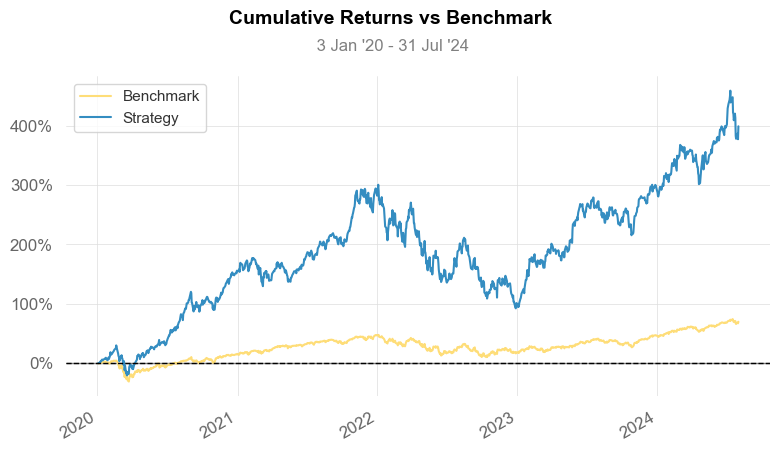

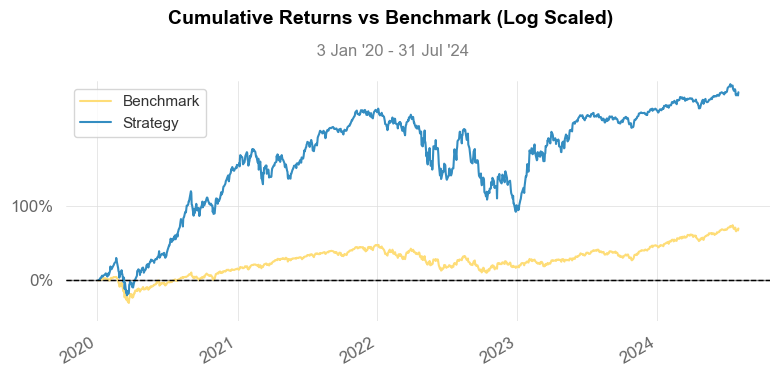

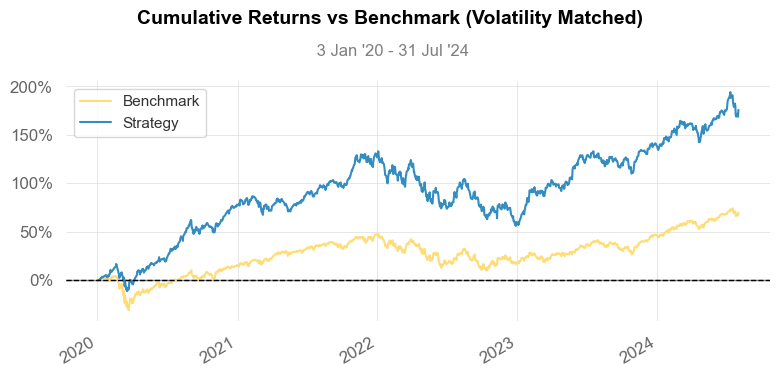

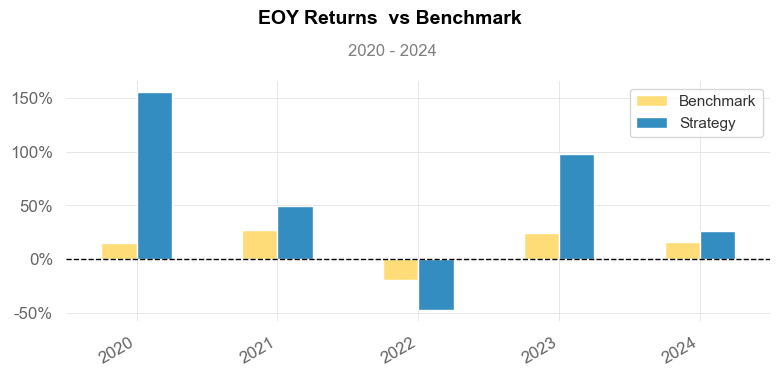

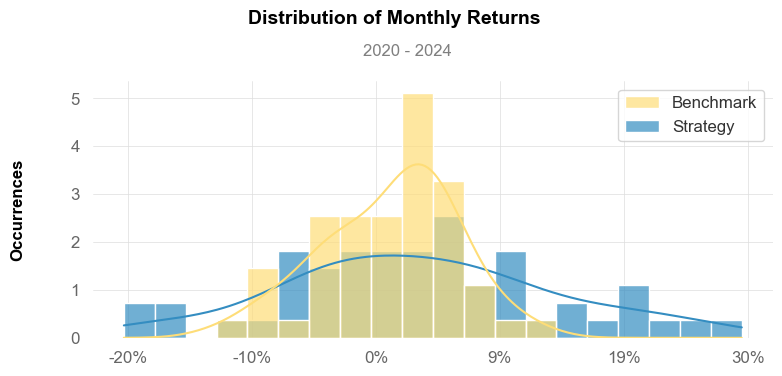

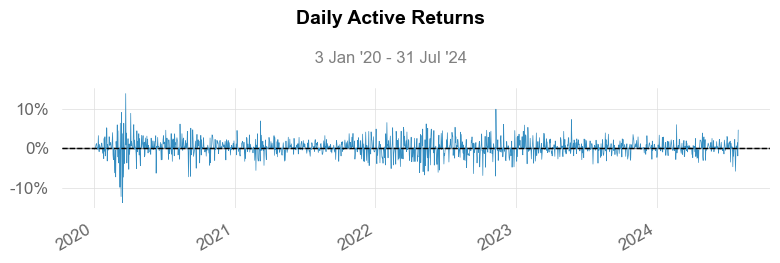

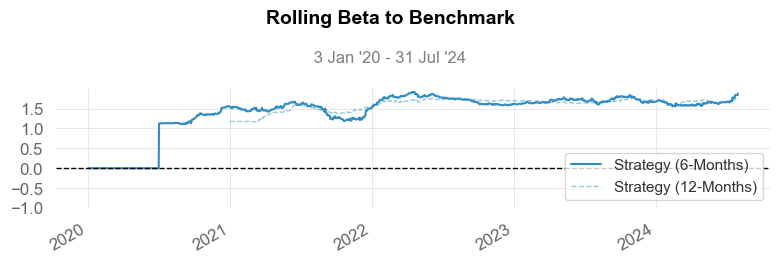

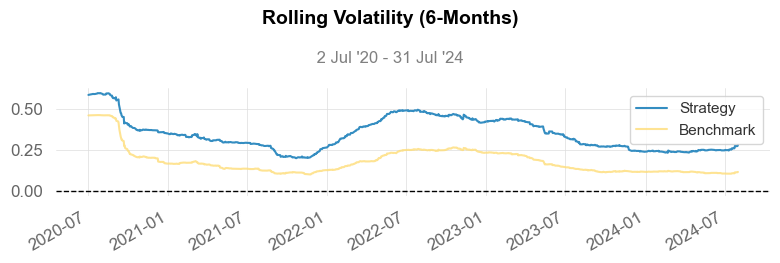

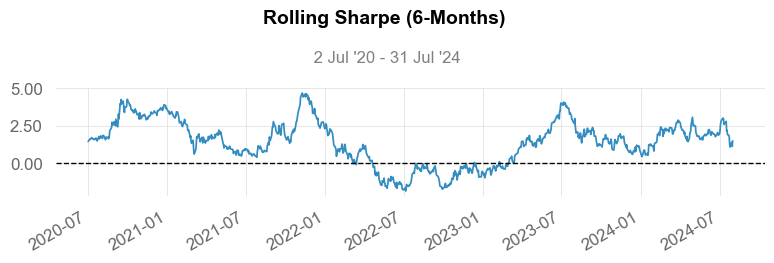

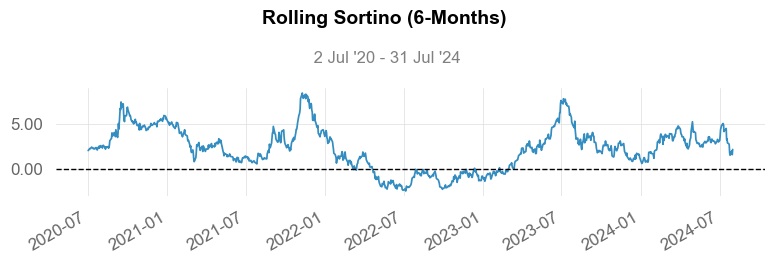

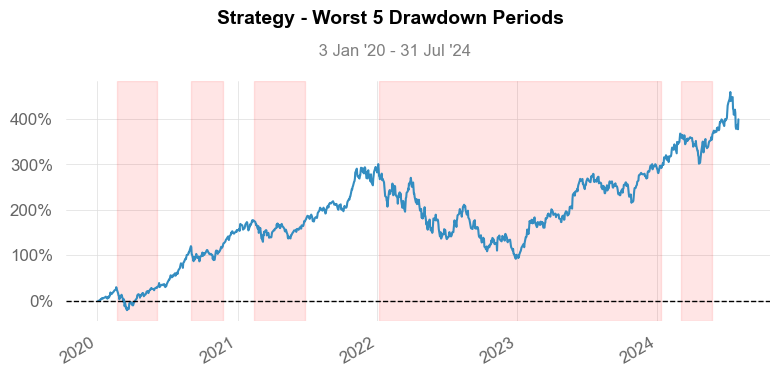

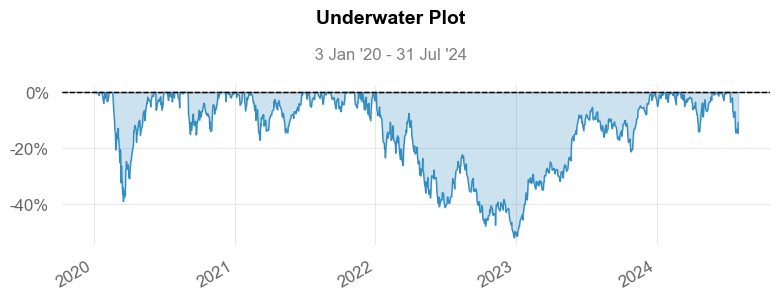

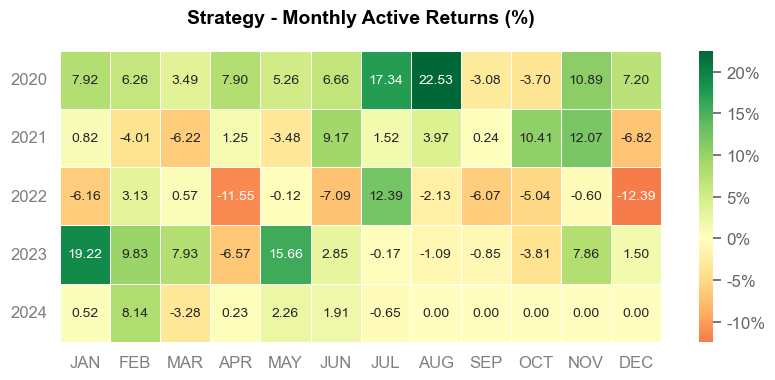

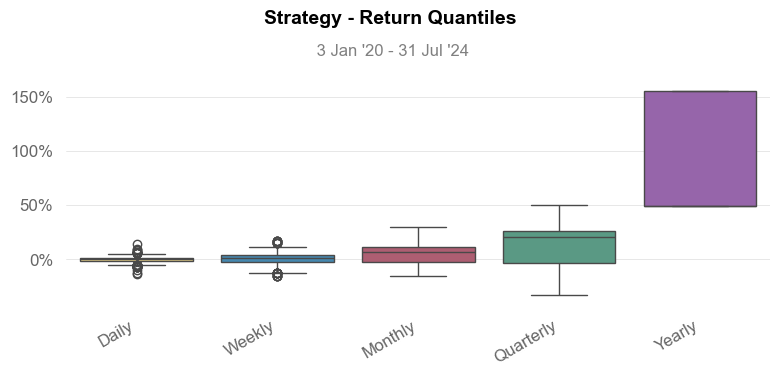

In [42]:
# Generating report on portfolio performance from Jan 1, 2020 to July 1, 2023
qs.reports.full(portfolio, benchmark = sp500)

#### The analysis provides the following:
 - Performance Metrics
      - The portfolio outperformed the benchmark, as evidenced by its significantly higher cumulative return. However, this superior performance comes with increased volatility compared to the index. Despite this volatility, the Sharpe and Sortino ratios indicate that the portfolio achieved high returns during the period under consideration, demonstrating robust risk-adjusted performance.

 - Worst 5 Drawdowns
 - Strategy Visualization of the Portfolio vs Benchmark:
      - Cumulative Returns
      - EOY Returns
      - Distribution of Monthly Returns
      - Daily Active Returns
      - Rolling Beta
      - Rolling Volatility
      - Rolling Sharpe (6-months)
      - Rolling Sortino (6-months)
      - Worst Drawdown Periods
      - Underwater Plot
      - Heatmap of Monthly Active Returns
      - Boxplots of Return Quantiles
  
### Optimizing Portfolio
Portfolio optimization is done by determining the optimal combination of assets and their correponding weights that maximizes the return and minimizes the risk of the portfolio. This process takes into account various factors such as historical data, correlation of the assets, market conditions, and economic perspective. The main goal is build a portfolio of diversified assets that balances the return and risk of the overall, along with reflecting the investor's risk of tolerance.

In order to do this, we refer to the downloaded data of the adjusted closing prices of the stocks we are considering, stored earlier in the DataFrame `data`.

### Mean-Variance Optimzation (MVO) Model
The Mean-Variance Optimization (MVO) Model aims to find the optimal portfolio allocation by balancing risk and return. The model uses the expected return and the covariance matrix of asset returns as inputs. The expected return is calculated as the weighted average of individual asset returns, while the covariance matrix is derived from the standard deviations and correlations of asset returns.

The MVO model has two main objectives:
<ul>
<li><b>Maximizing Expected Return for a Given Level of Risk:</b> Identify the portfolio with the highest expected return for a specified level of risk.</li>
<li><b>Minimizing Risk for a Given Level of Expected Return:</b> Identify the portfolio with the lowest risk for a specified level of expected return.</li>
</ul>
By applying mathematical optimization techniques, the MVO model generates the efficient frontier. This efficient frontier represents a set of optimal portfolios that offer the highest expected return for each level of risk. The resulting optimized weights from the model provide a clear strategy for portfolio allocation across various risk-return profiles.

Expected Returns (mu):
Ticker
AAPL    0.275970
AMD     0.266552
DIS    -0.093967
NVDA    0.918118
TSLA    0.580495
dtype: float64


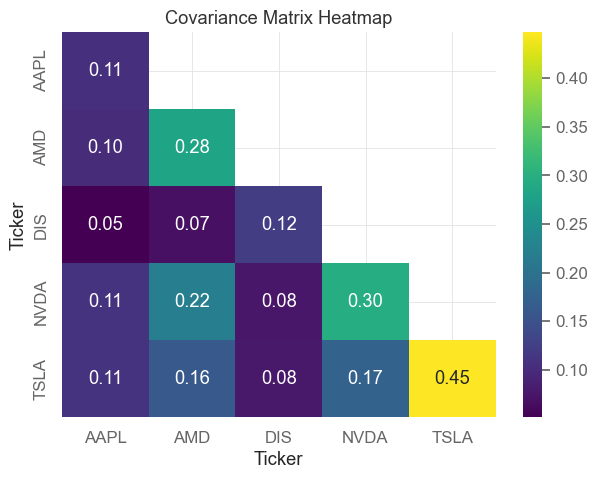

Optimized weights of the assets:


OrderedDict([('AAPL', 0.0),
             ('AMD', 0.0),
             ('DIS', 0.0),
             ('NVDA', 0.97156),
             ('TSLA', 0.02844)])

In [44]:
opt_df = data.copy()

# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(opt_df)
S = risk_models.sample_cov(opt_df)

# Display the expected returns
print("Expected Returns (mu):")
print(mu)

# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(7, 5))
mask = np.triu(np.ones_like(S, dtype=bool), k=1)
sns.heatmap(S, annot=True, cmap='viridis', fmt='.2f',mask=mask)
plt.title("Covariance Matrix Heatmap")
plt.show()

# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

clean_weights = ef.clean_weights()

# Printing optimized weights and expected performance for portfolio
print("Optimized weights of the assets:")
clean_weights

In [45]:
# Get the performance of the optimized portfolio
performance = ef.portfolio_performance(verbose=True)

Expected annual return: 90.9%
Annual volatility: 53.8%
Sharpe Ratio: 1.65


Based on historical data, NVIDIA and TESLA emerge as the assets with the highest expected return, NVIDIA followed by Tesla, albeit with a significant gap. Notably, Disney has underperformed over the period considered, resulting in a negative expected return.

All the assets considered in the portfolio exhibit positive covariance with each other. Tesla is observed to have high volatility, whereas the other assets demonstrate moderate volatility, with Apple having the lowest volatility.

The resulting optimized weights from the MVO model allocate the maximum proportion to NVIDIA stock with a minimal percentage allocated to TESLA. Despite Tesla's strong performance during the analyzed period, its high volatility affects its optimized weight in the portfolio.

Evaluating the performance of the efficient frontier, the portfolio with the optimized weights achieves an expected return of 90.9%, annual volatility of 53.8%, and a Sharpe ratio of 1.65.

The Sharpe Ratio measures the risk-adjusted return of the portfolio. It indicates how well the return compensates for the risk taken. A Sharpe ratio of 1.65 suggests that the portfolio provides a favorable return for the level of risk it carries.

However, the high volatility suggests that the portfolio may experience significant fluctuations in value. To mitigate this risk, further diversification by considering additional assets could enhance the portfolio's stability and overall performance.

In [46]:
opt_df

Ticker            AAPL         AMD         DIS        NVDA        TSLA
Date                                                                  
2020-01-02   72.876106   49.099998  147.040192    5.973634   28.684000
2020-01-03   72.167610   48.599998  145.353500    5.878019   29.534000
2020-01-06   72.742661   48.389999  144.510147    5.902670   30.102667
2020-01-07   72.400536   48.250000  144.559753    5.974131   31.270666
2020-01-08   73.565201   47.830002  144.262100    5.985336   32.809334
...                ...         ...         ...         ...         ...
2024-07-25  217.238556  138.320007   89.209999  112.279999  220.250000
2024-07-26  217.708008  139.990005   89.930000  113.059998  219.800003
2024-07-29  217.987686  139.750000   92.139999  111.589996  232.100006
2024-07-30  218.547043  138.440002   93.790001  103.730003  222.619995
2024-07-31  221.823242  144.479996   93.690002  117.019997  232.070007

[1152 rows x 5 columns]

In [60]:
opt_portfolio = daily_returns.iloc[:,1:]*clean_weights
opt_portfolio.drop(columns=opt_portfolio.columns[(opt_portfolio == 0.0).all()], inplace=True)
port_daily_returns = opt_portfolio['NVDA'] + opt_portfolio['TSLA']

port_daily_returns

Date
2020-01-02    0.000000
2020-01-03   -0.014708
2020-01-06    0.004622
2020-01-07    0.012866
2020-01-08    0.003222
                ...   
2024-07-25   -0.016192
2024-07-26    0.006691
2024-07-29   -0.011041
2024-07-30   -0.069595
2024-07-31    0.125685
Length: 1152, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-01-03   2020-01-03
End Period                 2024-07-31   2024-07-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          399.06%      1,856.98%
CAGR﹪                     27.43%       56.6%

Sharpe                     1.13         1.48
Prob. Sharpe Ratio         99.13%       99.93%
Smart Sharpe               1.03         1.35
Sortino                    1.63         2.32
Smart Sortino              1.49         2.12
Sortino/√2                 1.15         1.64
Smart Sortino/√2           1.05         1.5
Omega                      1.29         1.29

Max Drawdown               -52.04%      -65.78%
Longest DD Days            739          541
Volatility (ann.)          37.6%        53.81%
R^2                        0.75         0.75
Information Ratio          0.08         0.08
Calmar            

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-11-30  2022-10-14  2023-05-24   541    -65.776736        -63.750937
2  2020-02-20  2020-03-16  2020-05-08    79    -37.955025        -36.339480
3  2021-02-17  2021-03-08  2021-04-12    55    -24.508461        -19.373702
4  2024-07-11  2024-07-30  2024-07-31    21    -22.886522        -17.118396
5  2024-03-26  2024-04-19  2024-05-20    56    -19.615277        -16.292341

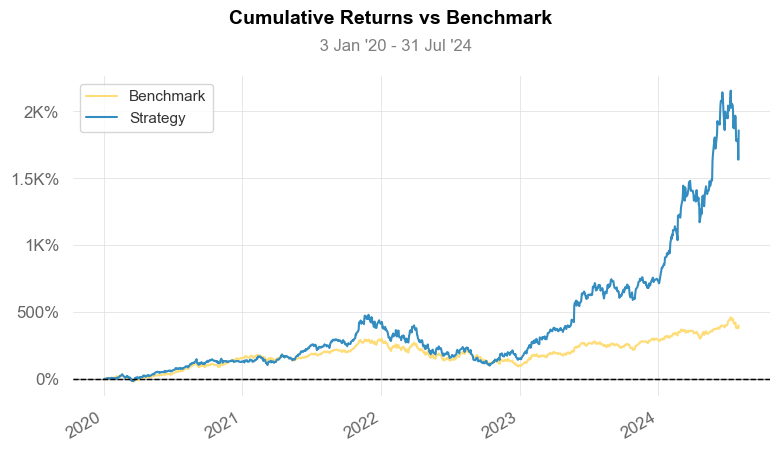

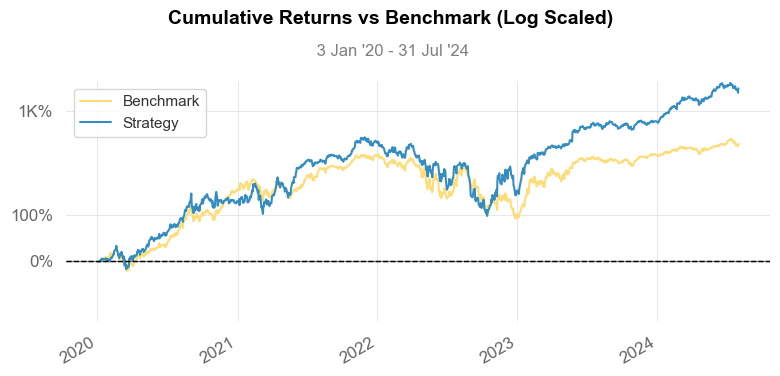

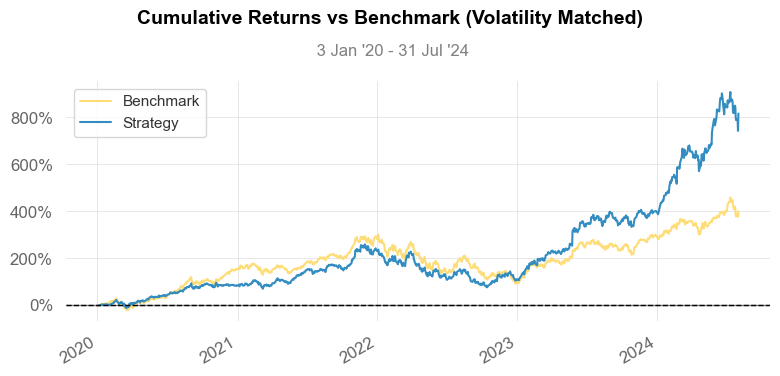

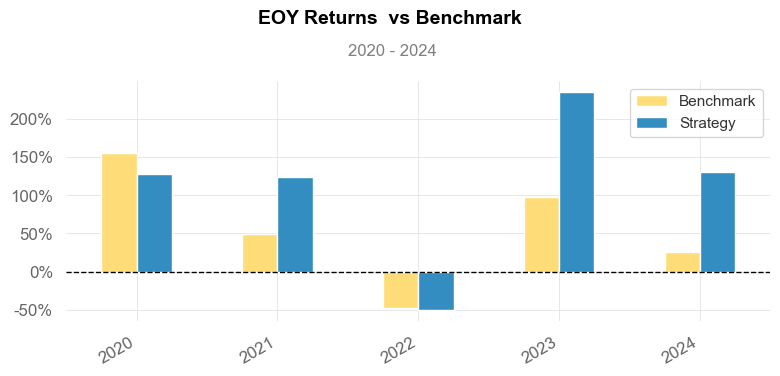

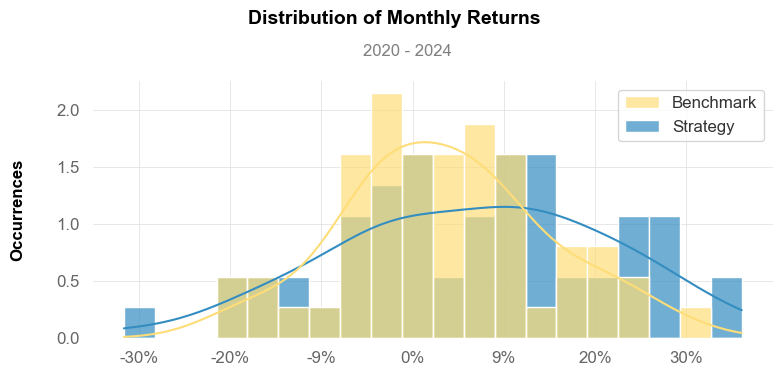

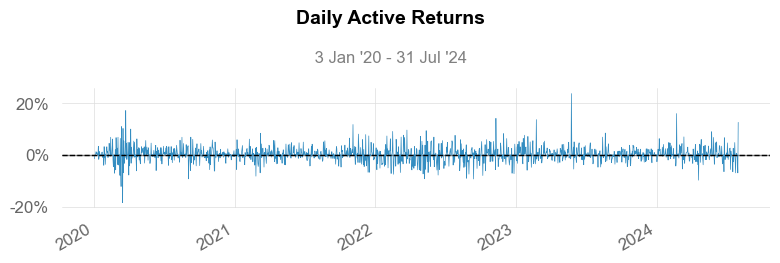

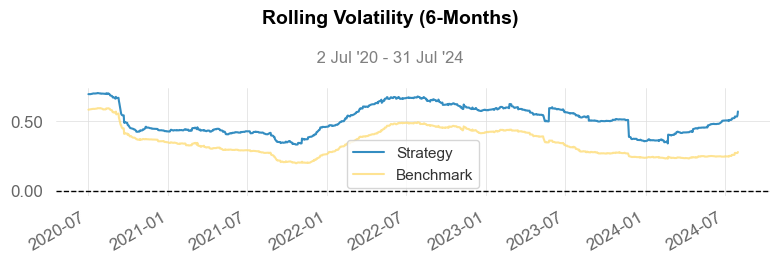

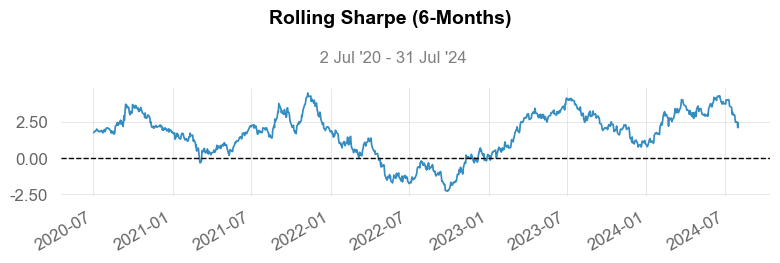

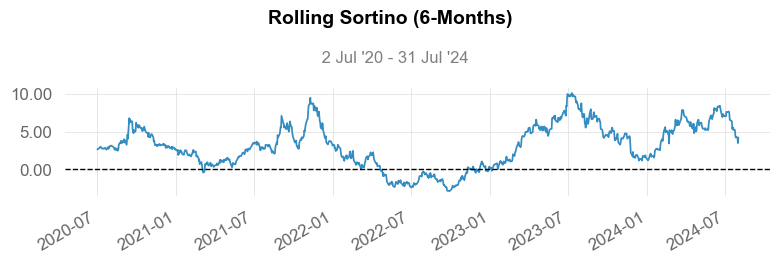

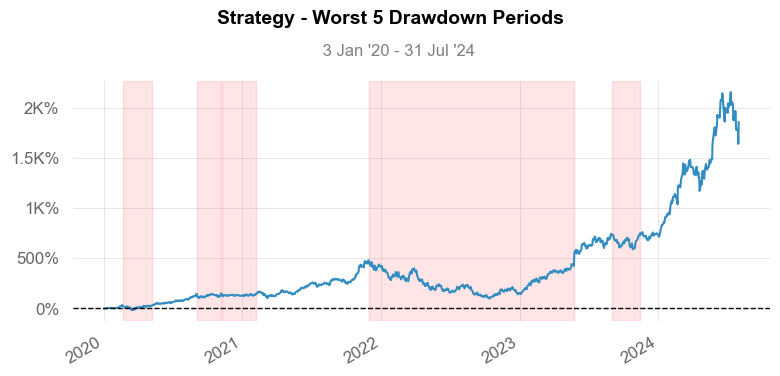

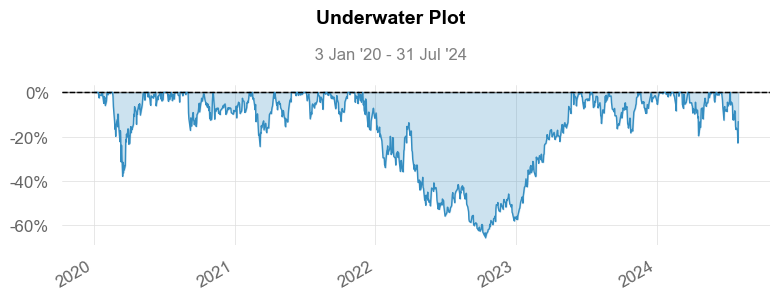

In [62]:
# Displaying new reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.full(port_daily_returns, benchmark = portfolio)